In [ ]:
from tensorflow.python.client import device_lib

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Read in image from google drive

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
data = pathlib.Path('/content/gdrive/MyDrive/facemask_dataset') 
count = len(list(data.glob('*/*.jpg')))
count

1878

In [ ]:
data_dir = '/content/gdrive/MyDrive/facemask_dataset'

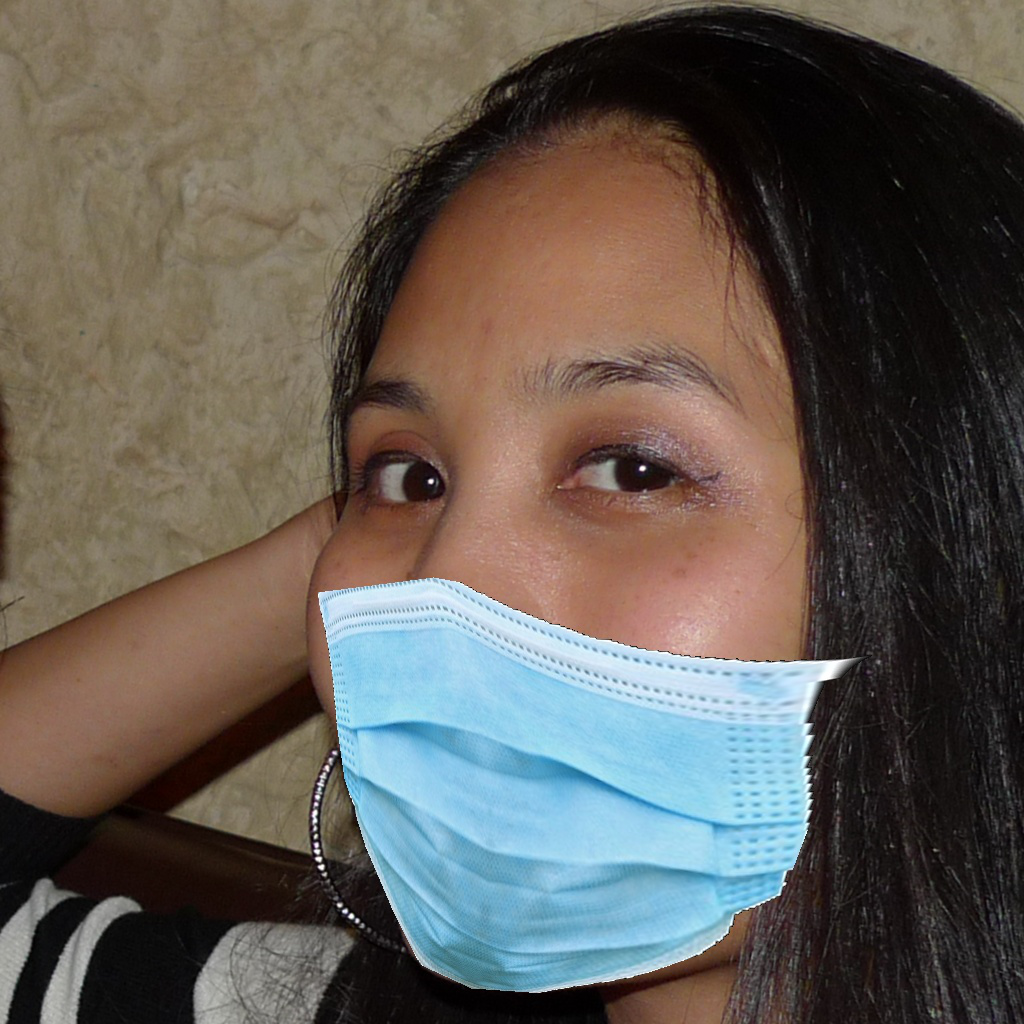

In [ ]:
correct_img = list(pathlib.Path(data_dir).glob('correct/*'))
PIL.Image.open(str(correct_img[0]))

# Train the model
## Skip the next two blocks to avoid the time-consuming model training process


In [ ]:
#use image_dataset_from_directory to creat train and validation dataset
# Changed the target size from 1024x1024 to 256x256 as the original images are too heavy on the system I/O side, in which case we may lose some details of the images but it's a trade-off for expediting the training process
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 20
train_datagen = ImageDataGenerator(rescale=1/255.0, shear_range=0.2, rotation_range=20, fill_mode='nearest', horizontal_flip=True,
                                   width_shift_range=0.2, height_shift_range=0.2, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(data_dir, target_size=(256, 256), class_mode='binary', batch_size=batch_size, subset='training')
valid_generator = train_datagen.flow_from_directory(data_dir, target_size=(256, 256), class_mode='binary', batch_size=batch_size, subset='validation')

#CNN Model
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, Activation 
from keras.layers import Conv2D, MaxPooling2D 

model = tf.keras.models.Sequential([
          Conv2D(16, 3, activation='relu', input_shape=(256, 256, 3)),
          MaxPooling2D(2,2),
          Conv2D(32, 3, activation='relu'),
          MaxPooling2D(2,2),
          Conv2D(64, 3, padding='same', activation='relu'),
          MaxPooling2D(2,2),
          Flatten(),
          Dropout(0.2), 
          Dense(32, activation='relu'),
          Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Define a checkpoint to save the data
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_name = '//content/gdrive/MyDrive/Colab Notebooks/Model/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
hist = model.fit(train_generator, validation_data=valid_generator, epochs=20, verbose=1, callbacks=callbacks_list,
                 steps_per_epoch = 1503 // batch_size,
                 validation_steps = 375 // batch_size)

Found 1503 images belonging to 2 classes.
Found 375 images belonging to 2 classes.
Epoch 1/20
75/75 [==============================] - 54s 714ms/step - loss: 0.9191 - accuracy: 0.5111 - val_loss: 0.6586 - val_accuracy: 0.6944

Epoch 00001: val_loss improved from inf to 0.65861, saving model to //content/gdrive/MyDrive/Colab Notebooks/Model/Weights-001--0.65861.hdf5
Epoch 2/20
75/75 [==============================] - 53s 709ms/step - loss: 0.6335 - accuracy: 0.6577 - val_loss: 0.4437 - val_accuracy: 0.8111

Epoch 00002: val_loss improved from 0.65861 to 0.44374, saving model to //content/gdrive/MyDrive/Colab Notebooks/Model/Weights-002--0.44374.hdf5
Epoch 3/20
75/75 [==============================] - 53s 705ms/step - loss: 0.4937 - accuracy: 0.7812 - val_loss: 0.5794 - val_accuracy: 0.6944

Epoch 00003: val_loss did not improve from 0.44374
Epoch 4/20
75/75 [==============================] - 52s 698ms/step - loss: 0.4284 - accuracy: 0.8060 - val_loss: 0.3711 - val_accuracy: 0.8333

Epoc

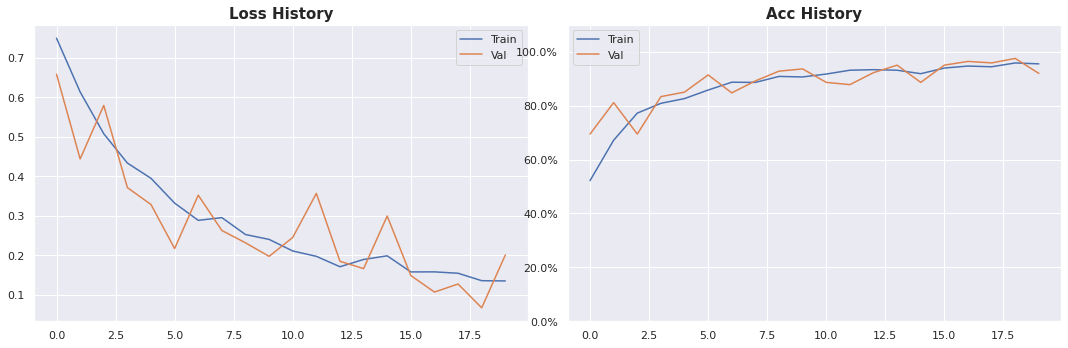

In [ ]:
# Design the learning curve
import pandas as pd
import seaborn as sns
sns.set()
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax1.set_title('Loss History', fontsize=15, fontweight='bold')
loss_hist = pd.DataFrame({'Train': hist.history['loss'], 'Val': hist.history['val_loss']})
loss_hist.plot(ax=ax1)
ax2 = fig.add_subplot(122)
ax2.set_title('Acc History', fontsize=15, fontweight='bold')
acc_hist = pd.DataFrame({'Train': hist.history['accuracy'], 'Val': hist.history['val_accuracy']})
acc_hist.plot(ax=ax2)
ax2.set_ylim([0.0, 1.1])
plt.tight_layout()
ax2.set_yticklabels(['{0:.1%}'.format(x) for x in ax2.get_yticks()])
plt.show()


In [ ]:
# Run this chunk to use the model we designed
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, Activation 
from keras.layers import Conv2D, MaxPooling2D 
final_model = tf.keras.models.Sequential([
          Conv2D(16, 3, activation='relu', input_shape=(256, 256, 3)),
          MaxPooling2D(2,2),
          Conv2D(32, 3, activation='relu'),
          MaxPooling2D(2,2),
          Conv2D(64, 3, padding='same', activation='relu'),
          MaxPooling2D(2,2),
          Flatten(),
          Dropout(0.2), 
          Dense(32, activation='relu'),
          Dense(1, activation=tf.nn.sigmoid)
])
wights_file = '//content/gdrive/MyDrive/Colab Notebooks/Model/Weights-019--0.06628.hdf5'
final_model.load_weights(wights_file)
final_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import cv2
import matplotlib.pyplot as plt 


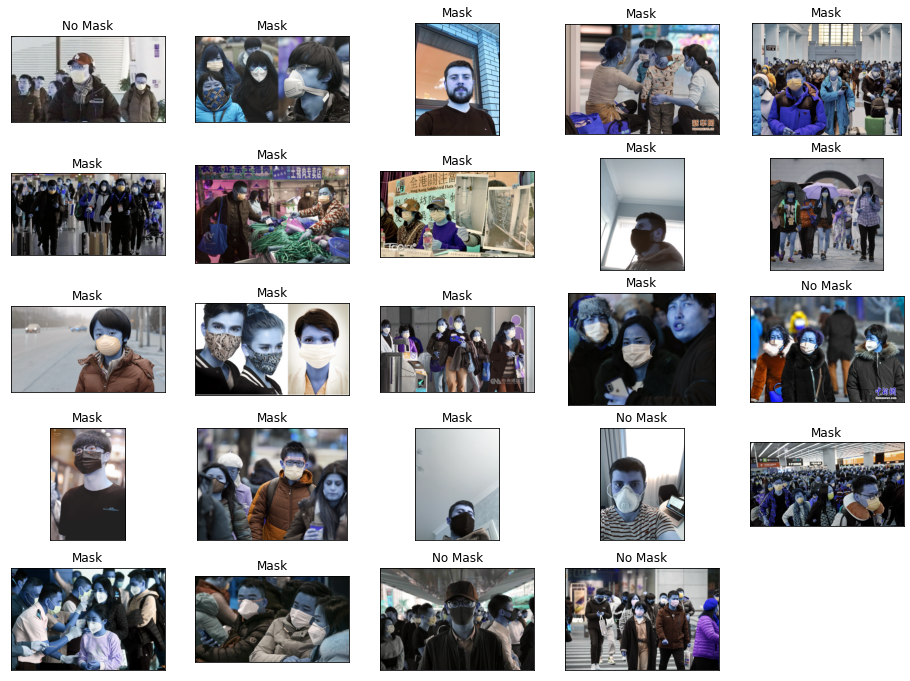

In [ ]:
fig=plt.figure(figsize=(16,12)) 
num=0 
for i in range(70,94): 
  y = fig.add_subplot(5, 5, num+1) 
  img = cv2.imread("/content/gdrive/MyDrive/facemask_dataset/validate/maksssksksss"+str(i)+".png")
  y.imshow(img)
  img = cv2.resize(img,(256,256)) 
  img = img.reshape(1,256,256,3) 
  if (final_model.predict(img).item()): 
    pred = "Mask" 
  else: 
    pred = "No Mask" 
  plt.title(pred) 
  y.axes.get_xaxis().set_visible(False) 
  y.axes.get_yaxis().set_visible(False) 
  num = num+1 
plt.show()